In [7]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.set_printoptions(threshold=np.inf) #show all array
np.random.seed(10)

In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
x_Train = x_train_image.reshape(60000, 784).astype("float32")
x_Test = x_test_image.reshape(10000, 784).astype("float32")

In [5]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [31]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Dense(units = 256,
               input_dim = 784,
               kernel_initializer = "normal",
               activation = "relu"))

In [36]:
model.add(Dense(units = 10,
               kernel_initializer = "normal",
               activation = "softmax"))

In [37]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [39]:
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot, validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4400 - acc: 0.8832 - val_loss: 0.2269 - val_acc: 0.9382
Epoch 2/10
 - 1s - loss: 0.1901 - acc: 0.9466 - val_loss: 0.1586 - val_acc: 0.9546
Epoch 3/10
 - 1s - loss: 0.1356 - acc: 0.9612 - val_loss: 0.1255 - val_acc: 0.9644
Epoch 4/10
 - 1s - loss: 0.1045 - acc: 0.9704 - val_loss: 0.1129 - val_acc: 0.9678
Epoch 5/10
 - 1s - loss: 0.0832 - acc: 0.9768 - val_loss: 0.1093 - val_acc: 0.9677
Epoch 6/10
 - 1s - loss: 0.0678 - acc: 0.9817 - val_loss: 0.0947 - val_acc: 0.9724
Epoch 7/10
 - 1s - loss: 0.0564 - acc: 0.9844 - val_loss: 0.0909 - val_acc: 0.9725
Epoch 8/10
 - 1s - loss: 0.0464 - acc: 0.9875 - val_loss: 0.0840 - val_acc: 0.9751
Epoch 9/10
 - 1s - loss: 0.0386 - acc: 0.9898 - val_loss: 0.0847 - val_acc: 0.9747
Epoch 10/10
 - 1s - loss: 0.0324 - acc: 0.9918 - val_loss: 0.0830 - val_acc: 0.9744


In [40]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc = "upper left")
    plt.show()

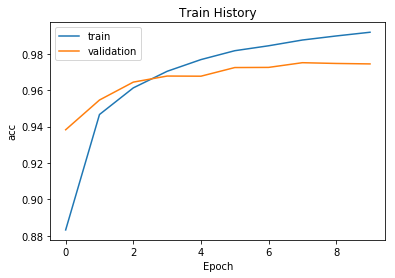

In [41]:
show_train_history(train_history, "acc", "val_acc")

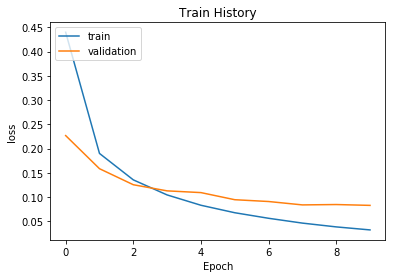

In [42]:
show_train_history(train_history, "loss", "val_loss")

In [44]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print("accuracy", scores[1])

10000/10000 [==============================] - 0s 19us/step

accuracy 0.977


In [46]:
prediction = model.predict_classes(x_Test)

In [47]:
prediction

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [49]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if(num > 25):
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = "binary")
        title = "label=" + str(labels[idx])
        if(len(prediction) > 0):
            title +=", predict=" + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx +=1
    plt.show()

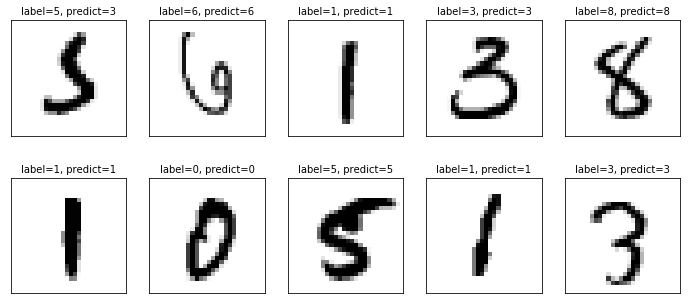

In [50]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx = 340)

In [52]:
pd.crosstab(y_test_label, prediction, rownames = ["label"], colnames = ["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,1,0,2,1,1,2,0
1,0,1124,3,1,0,1,3,0,3,0
2,10,1,987,7,3,1,2,11,10,0
3,1,0,0,993,0,3,0,5,4,4
4,2,0,0,1,956,0,4,3,0,16
5,2,0,0,7,1,867,6,1,4,4
6,6,2,1,1,1,4,941,1,1,0
7,1,4,6,4,1,0,0,1003,2,7
8,5,0,1,6,3,2,3,4,945,5


In [57]:
df = pd.DataFrame({"label": y_test_label, "predict": prediction})
df[0:2]

,label,predict
0,7,7
1,2,2


In [65]:
df[(df.label == 4) & (df.predict == 9)]

,label,predict
115,4,9
707,4,9
740,4,9
1242,4,9
2053,4,9
2130,4,9
2447,4,9
2907,4,9
3405,4,9
3533,4,9


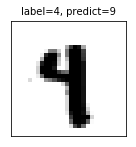

In [69]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx = 8520, num = 1)

In [70]:
model = Sequential()

In [71]:
model.add(Dense(units = 1000,
               input_dim = 784,
               kernel_initializer = "normal",
               activation = "relu"))

In [72]:
model.add(Dense(units = 10,
               kernel_initializer = "normal",
               activation = "softmax"))

In [73]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot, validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.0044 - acc: 0.9996 - val_loss: 0.0765 - val_acc: 0.9795
Epoch 2/10
 - 4s - loss: 0.0065 - acc: 0.9989 - val_loss: 0.0780 - val_acc: 0.9785
Epoch 3/10
 - 3s - loss: 0.0056 - acc: 0.9989 - val_loss: 0.0832 - val_acc: 0.9782
Epoch 4/10
 - 4s - loss: 0.0028 - acc: 0.9998 - val_loss: 0.0736 - val_acc: 0.9813
Epoch 5/10
 - 4s - loss: 0.0021 - acc: 0.9997 - val_loss: 0.0745 - val_acc: 0.9813
Epoch 6/10
 - 4s - loss: 9.4706e-04 - acc: 1.0000 - val_loss: 0.0748 - val_acc: 0.9818
Epoch 7/10
 - 4s - loss: 9.8960e-04 - acc: 0.9999 - val_loss: 0.0757 - val_acc: 0.9809
Epoch 8/10
 - 4s - loss: 6.0068e-04 - acc: 1.0000 - val_loss: 0.0773 - val_acc: 0.9818
Epoch 9/10
 - 4s - loss: 4.9511e-04 - acc: 1.0000 - val_loss: 0.0779 - val_acc: 0.9816
Epoch 10/10
 - 4s - loss: 3.9820e-04 - acc: 1.0000 - val_loss: 0.0782 - val_acc: 0.9815


In [75]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

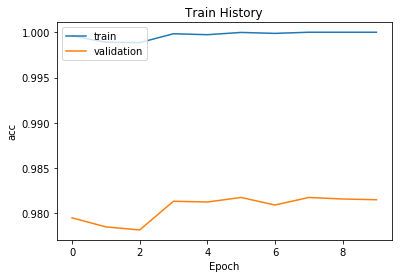

In [78]:
show_train_history(train_history, "acc", "val_acc")

In [79]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print("accuracy", scores[1])

10000/10000 [==============================] - 1s 52us/step

accuracy 0.9825


In [108]:
model = Sequential()

In [109]:
model.add(Dense(units = 1000,
               input_dim = 784,
               kernel_initializer = "normal",
               activation = "relu"))

In [110]:
model.add(Dropout(0.5))

In [111]:
model.add(Dense(units = 10,
               kernel_initializer = "normal",
               activation = "softmax"))

In [112]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [115]:
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot, validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0703 - val_acc: 0.9792
Epoch 2/10
 - 4s - loss: 0.0302 - acc: 0.9907 - val_loss: 0.0677 - val_acc: 0.9815
Epoch 3/10
 - 4s - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0709 - val_acc: 0.9806
Epoch 4/10
 - 4s - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0692 - val_acc: 0.9804
Epoch 5/10
 - 4s - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0698 - val_acc: 0.9808
Epoch 6/10
 - 4s - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0675 - val_acc: 0.9827
Epoch 7/10
 - 4s - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0704 - val_acc: 0.9807
Epoch 8/10
 - 4s - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0664 - val_acc: 0.9826
Epoch 9/10
 - 4s - loss: 0.0185 - acc: 0.9935 - val_loss: 0.0655 - val_acc: 0.9825
Epoch 10/10
 - 4s - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0709 - val_acc: 0.9815


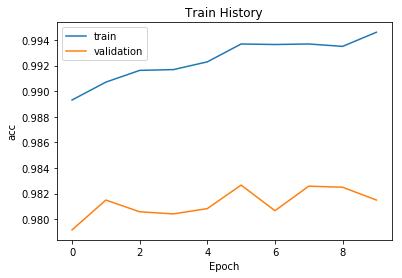

In [116]:
show_train_history(train_history, "acc", "val_acc")

In [117]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print("accuracy", scores[1])

10000/10000 [==============================] - 1s 54us/step

accuracy 0.9805


In [118]:
model = Sequential()

In [119]:
model.add(Dense(units = 1000,
               input_dim = 784,
               kernel_initializer = "normal",
               activation = "relu"))

In [120]:
model.add(Dropout(0.5))

In [121]:
model.add(Dense(units = 1000,
               kernel_initializer = "normal",
               activation = "relu"))

In [122]:
model.add(Dropout(0.5))

In [123]:
model.add(Dense(units = 10,
               kernel_initializer = "normal",
               activation = "softmax"))

In [124]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [127]:
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot, validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.3667 - acc: 0.8862 - val_loss: 0.1397 - val_acc: 0.9573
Epoch 2/10
 - 9s - loss: 0.1612 - acc: 0.9511 - val_loss: 0.1081 - val_acc: 0.9663
Epoch 3/10
 - 9s - loss: 0.1195 - acc: 0.9616 - val_loss: 0.0870 - val_acc: 0.9748
Epoch 4/10
 - 9s - loss: 0.0995 - acc: 0.9687 - val_loss: 0.0843 - val_acc: 0.9746
Epoch 5/10
 - 9s - loss: 0.0861 - acc: 0.9726 - val_loss: 0.0778 - val_acc: 0.9764
Epoch 6/10
 - 9s - loss: 0.0753 - acc: 0.9758 - val_loss: 0.0799 - val_acc: 0.9776
Epoch 7/10
 - 9s - loss: 0.0659 - acc: 0.9789 - val_loss: 0.0838 - val_acc: 0.9763
Epoch 8/10
 - 9s - loss: 0.0619 - acc: 0.9802 - val_loss: 0.0731 - val_acc: 0.9789
Epoch 9/10
 - 9s - loss: 0.0575 - acc: 0.9818 - val_loss: 0.0724 - val_acc: 0.9799
Epoch 10/10
 - 9s - loss: 0.0510 - acc: 0.9826 - val_loss: 0.0792 - val_acc: 0.9782


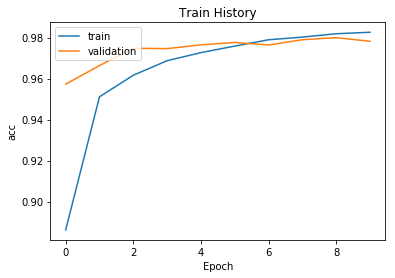

In [128]:
show_train_history(train_history, "acc", "val_acc")

In [129]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print("accuracy", scores[1])

10000/10000 [==============================] - 1s 99us/step

accuracy 0.9807


In [ ]:
w